In [10]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

In [11]:
H = create_hamiltonian(system), 0.05

In [12]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

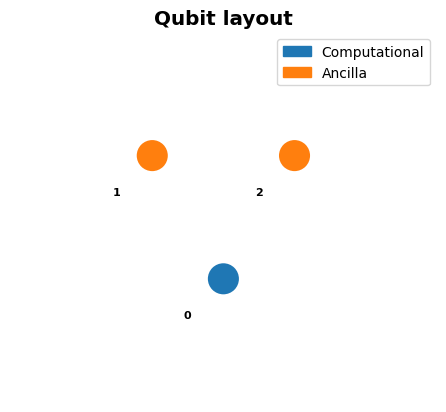

In [13]:
qubits.show_layout()

In [20]:
theta_opt = np.load("losses_theta_opt.npy")

In [21]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=400, n_grad=10, theta_init=theta_opt)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=84448


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 1.469834527902226e-05 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.23129356e-05  0.00000000e+00
 -1.73902279e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.83813130e-05  0.00000000e+00  1.12716947e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.16479655e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.28913335e-05  0.00000000e+00  1.16769457e-05  0.00000

In [22]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [23]:
theta_opt

array([0.55104511, 1.        , 1.        , 0.96894965, 0.87442945,
       0.6623773 , 1.00035059, 0.96836249, 1.00193875, 1.01761509,
       0.78695823, 0.95493586, 1.18027798, 1.33713169, 1.00621058,
       0.91421727, 0.8085744 , 0.98457504, 1.05085327, 1.02445214,
       1.02418387, 0.96702816, 0.95894523, 0.88182106, 0.96821522,
       0.90914335, 0.86788628, 1.01107552, 1.02104551, 1.02498459,
       0.99877738, 1.01694402, 1.0005641 , 0.38404655, 0.91047801,
       0.92308991, 0.95450359, 1.07782336, 0.95622026, 1.0406578 ,
       0.74442022, 1.04078235, 0.99438968, 0.97849157, 1.007329  ,
       1.0281584 , 0.93346472, 1.02434427, 0.69362222, 1.05691943,
       0.99754412, 0.99669106, 0.97834579, 0.93662903, 0.95344725,
       0.99333185, 0.95995425, 0.74224414, 1.00667199, 1.09811169,
       0.9681082 , 0.85455692, 0.99136472, 0.98247282, 0.9386397 ,
       1.03120951, 0.99774719, 1.14932744, 0.96567527, 1.00143019,
       0.82714397, 1.06786796, 1.07063478, 0.97910429, 0.63577

c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

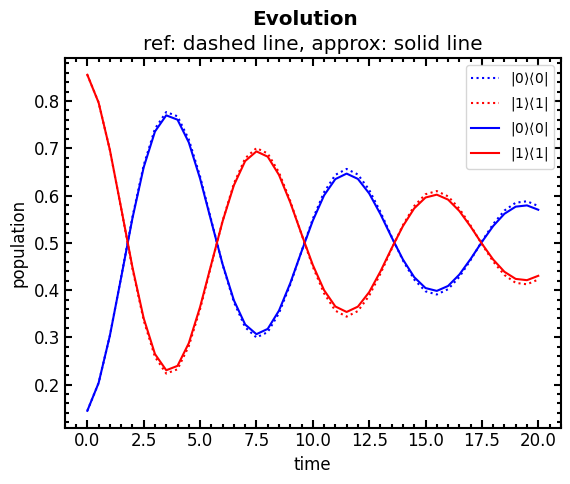

In [24]:
rho0 = rho_rand_haar(1, 4)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

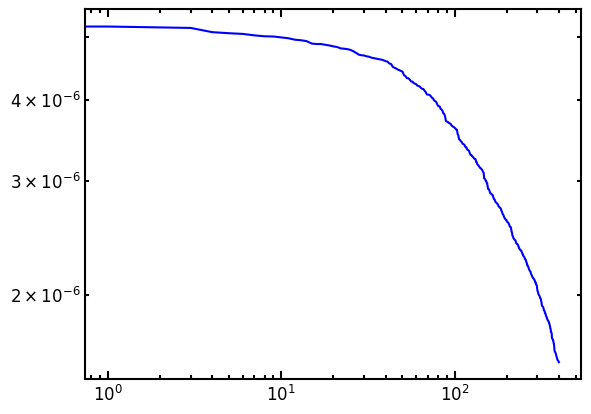

In [25]:
plt.loglog(errors)